# CONCLUSIONS

## Final data preparation

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

We have now the datasets from the first 2 parts of the project:
- **tweets** as the dataset we obtained from the Twitter scraping and Sentiment/Emotion classification;
- **data1** as the dataset obtained by merging the data about vaccinations and those about the national covid situation.

In [2]:
tweets = pd.read_csv("tweets_sent+emo.csv")
data1 = pd.read_csv("final.csv")

In [3]:
tweets.head(5)

,date,time,username,tweet,language,mentions,replies_count,retweets_count,likes_count,hashtags,Sentiment,Emotions
0,2021-12-21,23:47:42,cris_cersei,Cmq forzare la gente al vaccino sterminando se...,it,[],14,97,465,[],negative,anger
1,2021-12-21,23:37:18,astramezzi,"Coronavirus, Israele annuncia inoculazione qua...",it,[],64,325,856,[],negative,anger
2,2021-12-21,23:30:45,gavinosanna1967,- Col nuovo vaccino niente più scuse per i no ...,it,[],56,206,1208,[],negative,anger
3,2021-12-21,23:17:15,vitalbaa,Dopo mesi passati a contrapporre vaccino e tam...,it,[],31,49,383,[],negative,anger
4,2021-12-21,22:59:08,christian_fsi,Oh! Finalmente è uscito il #Novavax. Un altro ...,it,[],16,44,231,['novavax'],negative,anger


In [4]:
data1.head(5)

,YearWeekISO,hosp_symptoms,new_hosp_symptoms,intensive_care,new_intensive_care,hosp,new_hosp,positives,new_positives,discharged,...,deceased,new_deceased,swabs,new_swabs,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Total,Vax_Camp
0,2020-W09,639,0.0,140,0.0,779,0.0,1577,0.0,83,...,34,0.0,21127,0.0,0.0,0.0,0.0,0.0,0.0,No
1,2020-W10,3557,2918.0,650,510.0,4207,3428.0,6387,4810.0,622,...,366,332.0,49937,28810.0,0.0,0.0,0.0,0.0,0.0,No
2,2020-W11,9663,6106.0,1672,1022.0,11335,7128.0,20603,14216.0,2335,...,1809,1443.0,124899,74962.0,0.0,0.0,0.0,0.0,0.0,No
3,2020-W12,19846,10183.0,3009,1337.0,22855,11520.0,46638,26035.0,7024,...,5476,3667.0,258402,133503.0,0.0,0.0,0.0,0.0,0.0,No
4,2020-W13,27386,7540.0,3906,897.0,31292,8437.0,73880,27242.0,13030,...,10779,5303.0,454030,195628.0,0.0,0.0,0.0,0.0,0.0,No


We want to create a new dataset where each row has the number of tweets classified by their Sentiment (negative, positive) and their Emotion (Anger, Fear, Sadness, Joy) by week, because the data about vaccination is divided weekly; e.g. we want to know how many tweets are classified as Negative in the 13th week of 2021 .

We are interested in the columns which describe the date, the *sentiments* and *emotions* in **tweets** dataset.

So we create a new dataframe with those informations:

In [5]:
dataframe = pd.DataFrame(columns = ["date", "Negative", "Positive", "Anger","Fear","Sadness","Joy"])
dataframe["date"] = tweets["date"]
dataframe.head(5)

,date,Negative,Positive,Anger,Fear,Sadness,Joy
0,2021-12-21,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-21,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-12-21,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-12-21,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-21,NaN,NaN,NaN,NaN,NaN,NaN


We translate the informations about Sentiments and Emotions to the new dataframe by attributing them the value of 1 and 0; e.g. if the sentiment of a tweet is negative, its Negative column will be 1 and if the emotions is Anger, its Anger column will be 1; the other sentiment and emotions cells will be NaNs and later filled with 0.

Doing so, we will be able to group and count these elements later.

In [6]:
#we need to access the index in the tweets dataset so we can attribute the value of that tweet in the new dataset
for i in range(len(tweets)):
    if tweets["Sentiment"][i] == "negative":
        dataframe["Negative"][i] = 1
    if tweets["Sentiment"][i] == "positive":
        dataframe["Positive"][i] = 1
    if tweets["Emotions"][i] == "anger":
        dataframe["Anger"][i] = 1
    if tweets["Emotions"][i] == "fear":
        dataframe["Fear"][i] = 1
    if tweets["Emotions"][i] == "sadness":
        dataframe["Sadness"][i] = 1
    if tweets["Emotions"][i] == "joy":
        dataframe["Joy"][i] = 1

# now we fill the NaN cells with 0
dataframe = dataframe.fillna(0)

In [7]:
#Converting date column to datetime so we can group by week later
dataframe["date"] = pd.to_datetime(dataframe["date"])
dataframe

,date,Negative,Positive,Anger,Fear,Sadness,Joy
0,2021-12-21,1,0,1,0,0,0
1,2021-12-21,1,0,1,0,0,0
2,2021-12-21,1,0,1,0,0,0
3,2021-12-21,1,0,1,0,0,0
4,2021-12-21,1,0,1,0,0,0
...,...,...,...,...,...,...,...
39261,2021-03-01,1,0,1,0,0,0
39262,2021-03-01,1,0,1,0,0,0
39263,2021-03-01,1,0,1,0,0,0
39264,2021-03-01,1,0,1,0,0,0


We have now a dataframe of 39266 rows, each row representing each tweet with its sentiment and emotion.

We can now sum the data grouping by week so we can merge with the other dataset:

In [8]:
groupby_week = dataframe.resample('W', on="date").sum()
#resample, method for frequency conversion and resampling of time series with datatime format (on 'W', weeks)
groupby_week = groupby_week.reset_index()
groupby_week.head(5)

,date,Negative,Positive,Anger,Fear,Sadness,Joy
0,2021-03-07,767,84,478,158,128,87
1,2021-03-14,1515,133,879,415,228,126
2,2021-03-21,1755,140,1025,466,267,137
3,2021-03-28,1052,88,692,216,143,89
4,2021-04-04,873,78,563,176,126,86


Now, we create a Week column so it follows the format of "YearWeekISO" of the vaccination dataset to merge the datasets correctly.

We do this by using the function isocalendar() from datatime in order to get the number of the week; we then convert it to string and add it to "2021-W" to recreate the format.

Finally, we substitute 2021-W9 with 2021-W09 so it's in the same format as the dataset *data1*.

In [9]:
groupby_week["Week"] = "2021-W" + groupby_week["date"].dt.isocalendar().week.astype(str)
groupby_week["Week"].replace({"2021-W9":"2021-W09"}, inplace = True)
#replace because we know it's the only value that needs to be modified
groupby_week = groupby_week[["date","Week","Negative","Positive","Anger","Fear","Sadness","Joy"]] 
#reorder to have Week after date
groupby_week.head(5)

,date,Week,Negative,Positive,Anger,Fear,Sadness,Joy
0,2021-03-07,2021-W09,767,84,478,158,128,87
1,2021-03-14,2021-W10,1515,133,879,415,228,126
2,2021-03-21,2021-W11,1755,140,1025,466,267,137
3,2021-03-28,2021-W12,1052,88,692,216,143,89
4,2021-04-04,2021-W13,873,78,563,176,126,86


Now we have prepared the sentiment/emotion dataframe by week and it's ready for the merge.

We can start to work with *data1*. We will concentrate on the columns "YearWeekISO","new_hosp_symptoms","new_intensive_care","new_hosp","new_deceased","new_positives","Total" (Total stands for total vaccination per week as the sum of first, second, additional and unknown dose).

They are more relevant for our research question, we are more interested on the marginal increase by week than the absolute value.

In [10]:
data1.tail(5)

,YearWeekISO,hosp_symptoms,new_hosp_symptoms,intensive_care,new_intensive_care,hosp,new_hosp,positives,new_positives,discharged,...,deceased,new_deceased,swabs,new_swabs,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Total,Vax_Camp
91,2021-W47,4964,619.0,638,118.0,5602,737.0,186443,37683.0,4687701,...,133674,497.0,118335763,3836023.0,2062426.0,393159.0,3460132.0,658.0,5916375.0,Yes
92,2021-W48,5597,633.0,736,98.0,6333,731.0,232000,45557.0,4742887,...,134195,521.0,122335117,3999354.0,551602.0,357440.0,7973458.0,0.0,8882500.0,Yes
93,2021-W49,6697,1100.0,829,93.0,7526,1193.0,284877,52877.0,4805809,...,134831,636.0,125992518,3657401.0,591792.0,355852.0,8757668.0,4.0,9705316.0,Yes
94,2021-W50,7726,1029.0,966,137.0,8692,1166.0,362275,77398.0,4891239,...,135641,810.0,130368736,4376218.0,579662.0,397263.0,9736909.0,12.0,10713846.0,Yes
95,2021-W51,8544,818.0,1012,46.0,9554,862.0,402729,40454.0,4933663,...,136077,436.0,132337126,1968390.0,366068.0,319358.0,6788120.0,0.0,7473546.0,Yes


In [11]:
data1.columns

Index(['YearWeekISO', 'hosp_symptoms', 'new_hosp_symptoms', 'intensive_care',
       'new_intensive_care', 'hosp', 'new_hosp', 'positives', 'new_positives',
       'discharged', 'new_discharged', 'deceased', 'new_deceased', 'swabs',
       'new_swabs', 'FirstDose', 'SecondDose', 'DoseAdditional1',
       'UnknownDose', 'Total', 'Vax_Camp'],
      dtype='object')

We rename "YearWeekISO" to "Week" as it's easier to call the column, and "Total" with "new_vaccination" as it is more representative of the meaning of the data.

In [12]:
week_data = data1[["YearWeekISO","new_hosp_symptoms","new_intensive_care","new_hosp","new_deceased","new_positives","Total"]]
week_data = week_data.rename(columns = {"YearWeekISO":"Week", "Total":"new_vaccination"})
week_data

,Week,new_hosp_symptoms,new_intensive_care,new_hosp,new_deceased,new_positives,new_vaccination
0,2020-W09,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-W10,2918.0,510.0,3428.0,332.0,4810.0,0.0
2,2020-W11,6106.0,1022.0,7128.0,1443.0,14216.0,0.0
3,2020-W12,10183.0,1337.0,11520.0,3667.0,26035.0,0.0
4,2020-W13,7540.0,897.0,8437.0,5303.0,27242.0,0.0
...,...,...,...,...,...,...,...
91,2021-W47,619.0,118.0,737.0,497.0,37683.0,5916375.0
92,2021-W48,633.0,98.0,731.0,521.0,45557.0,8882500.0
93,2021-W49,1100.0,93.0,1193.0,636.0,52877.0,9705316.0
94,2021-W50,1029.0,137.0,1166.0,810.0,77398.0,10713846.0


Merging the two datasets:
- week_data: data about hospitalization, positives, deceased, vaccination etc.,
- groupby_week: data about tweets' sentiments and emotions.

In [13]:
#merge function merges the datasets on the common column (Week).
df_merged = groupby_week.merge(week_data)
df_merged.head(5)

,date,Week,Negative,Positive,Anger,Fear,Sadness,Joy,new_hosp_symptoms,new_intensive_care,new_hosp,new_deceased,new_positives,new_vaccination
0,2021-03-07,2021-W09,767,84,478,158,128,87,2506.0,374.0,2880.0,2086.0,50495.0,3487554.0
1,2021-03-14,2021-W10,1515,133,879,415,228,126,3374.0,477.0,3851.0,2360.0,58404.0,3878048.0
2,2021-03-21,2021-W11,1755,140,1025,466,267,137,2966.0,366.0,3332.0,2797.0,40406.0,3359466.0
3,2021-03-28,2021-W12,1052,88,692,216,143,89,1217.0,231.0,1448.0,2991.0,1500.0,4810152.0
4,2021-04-04,2021-W13,873,78,563,176,126,86,530.0,42.0,567.0,3097.0,-4137.0,5095848.0


In [14]:
df_merged.to_csv("Sentiment + data.csv", index = False)

In [15]:
final_df = pd.read_csv("Sentiment + data.csv")

In [16]:
final_df

,date,Week,Negative,Positive,Anger,Fear,Sadness,Joy,new_hosp_symptoms,new_intensive_care,new_hosp,new_deceased,new_positives,new_vaccination
0,2021-03-07,2021-W09,767,84,478,158,128,87,2506.0,374.0,2880.0,2086.0,50495.0,3487554.0
1,2021-03-14,2021-W10,1515,133,879,415,228,126,3374.0,477.0,3851.0,2360.0,58404.0,3878048.0
2,2021-03-21,2021-W11,1755,140,1025,466,267,137,2966.0,366.0,3332.0,2797.0,40406.0,3359466.0
3,2021-03-28,2021-W12,1052,88,692,216,143,89,1217.0,231.0,1448.0,2991.0,1500.0,4810152.0
4,2021-04-04,2021-W13,873,78,563,176,126,86,530.0,42.0,567.0,3097.0,-4137.0,5095848.0
5,2021-04-11,2021-W14,974,88,653,184,155,70,106.0,22.0,133.0,3224.0,1061.0,5912549.0
6,2021-04-18,2021-W15,716,69,434,175,102,74,-2008.0,-150.0,-2158.0,2673.0,-45679.0,6627311.0
7,2021-04-25,2021-W16,460,73,284,101,72,76,-3587.0,-349.0,-3936.0,2311.0,-30928.0,7423324.0
8,2021-05-02,2021-W17,425,94,278,98,52,91,-3107.0,-395.0,-3502.0,1939.0,-40677.0,8954932.0
9,2021-05-09,2021-W18,483,74,277,129,80,71,-2240.0,-359.0,-2599.0,1656.0,-29254.0,9902605.0


### Data Dictionary
+ **date**: date of the first day of the week.
+ **Week**: number of week in that year.
+ **Negative**: number of tweets (with 100+ likes) which have a negative sentiment during a certain week.
+ **Positive**: number of tweets (with 100+ likes) which have a positive sentiment during a certain week.
+ **Anger**: number of tweets (with 100+ likes) which have a anger emotion during a certain week.
+ **Fear**: number of tweets (with 100+ likes) which have a fear emotion during a certain week.
+ **Sadness**: number of tweets (with 100+ likes) which have a sad emotion during a certain week.
+ **Joy**: number of tweets (with 100+ likes) which have a joy emotion during a certain week.
+ **new_hosp_symptoms:** Number of new people hospitalized with symptoms each week.
+ **new_intensive_care:** Number of new people in intensive care each week.
+ **new_hosp:** Total number of new people hospedalized (hospitalized with symptoms + intesive care).
+ **new_deceased:** Number of new deceased people.
+ **new_positives:** Number of new positives.
+ **new_vaccination:** Number of new doses vaccinated (first, second, additional, unknown doses).

## Scaling data

Now we have the dataset with the data we are interested in.

In order to plot the data we need to scale each column, to standardize it.

By doing so, we transform our numeric datas so that they fit within a 0-1 scale, enabling us to compare performances between different type of data; e.g. Negative comments and Vaccination.
- MinMaxScaler() individuates the max and min value by attributing them 1 and 0.
- fit_transform() is the function that we use to scale the data based on the max and min.

In [17]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

scaled = min_max_scaler.fit_transform(final_df.drop(columns = ["date","Week"]))

With fit_transform we receive arrays with the scaled informations, we need now to recreate the dataframe.

In [18]:
scaled_df = pd.DataFrame(scaled, columns = ["Negative", "Positive", "Anger", "Fear","Sadness","Joy","new_hosp_symptoms","new_intensive_care",
                                               "new_hosp", "new_deceased","new_positives","new_vaccination"])
scaled_df.head(5)

,Negative,Positive,Anger,Fear,Sadness,Joy,new_hosp_symptoms,new_intensive_care,new_hosp,new_deceased,new_positives,new_vaccination
0,0.263128,0.533333,0.232437,0.242353,0.411017,0.572650,0.875305,0.883087,0.875305,0.637810,0.830088,0.058269
1,0.681006,0.941667,0.580225,0.847059,0.834746,0.905983,1.000000,1.000000,1.000000,0.725016,0.880039,0.103112
2,0.815084,1.000000,0.706852,0.967059,1.000000,1.000000,0.941388,0.874007,0.933350,0.864099,0.766369,0.043560
3,0.422346,0.566667,0.418040,0.378824,0.474576,0.589744,0.690131,0.720772,0.691409,0.925843,0.520649,0.210153
4,0.322346,0.483333,0.306158,0.284706,0.402542,0.564103,0.591438,0.506243,0.578271,0.959580,0.485048,0.242961


In [19]:
scaled_df = final_df[["Week","date"]].join(scaled_df) #join so we have the date and week columns
scaled_df['date'] = pd.to_datetime(scaled_df['date'])
scaled_df.head(5)

,Week,date,Negative,Positive,Anger,Fear,Sadness,Joy,new_hosp_symptoms,new_intensive_care,new_hosp,new_deceased,new_positives,new_vaccination
0,2021-W09,2021-03-07,0.263128,0.533333,0.232437,0.242353,0.411017,0.572650,0.875305,0.883087,0.875305,0.637810,0.830088,0.058269
1,2021-W10,2021-03-14,0.681006,0.941667,0.580225,0.847059,0.834746,0.905983,1.000000,1.000000,1.000000,0.725016,0.880039,0.103112
2,2021-W11,2021-03-21,0.815084,1.000000,0.706852,0.967059,1.000000,1.000000,0.941388,0.874007,0.933350,0.864099,0.766369,0.043560
3,2021-W12,2021-03-28,0.422346,0.566667,0.418040,0.378824,0.474576,0.589744,0.690131,0.720772,0.691409,0.925843,0.520649,0.210153
4,2021-W13,2021-04-04,0.322346,0.483333,0.306158,0.284706,0.402542,0.564103,0.591438,0.506243,0.578271,0.959580,0.485048,0.242961


In [20]:
scaled_df.to_csv("final scaled df.csv", index = False) #exporting to avoid reloading all the chunks

## Plotting

*Reminder: all the datasets and the plots below are weekly data and not daily because we needed to match it with the dataset about vaccinations.*

In [4]:
scaled_df = pd.read_csv("final scaled df.csv")
scaled_df["date"] = pd.to_datetime(scaled_df["date"])

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")
plt.style.use("seaborn-dark-palette")

import datetime as dt

### Negative comments trend

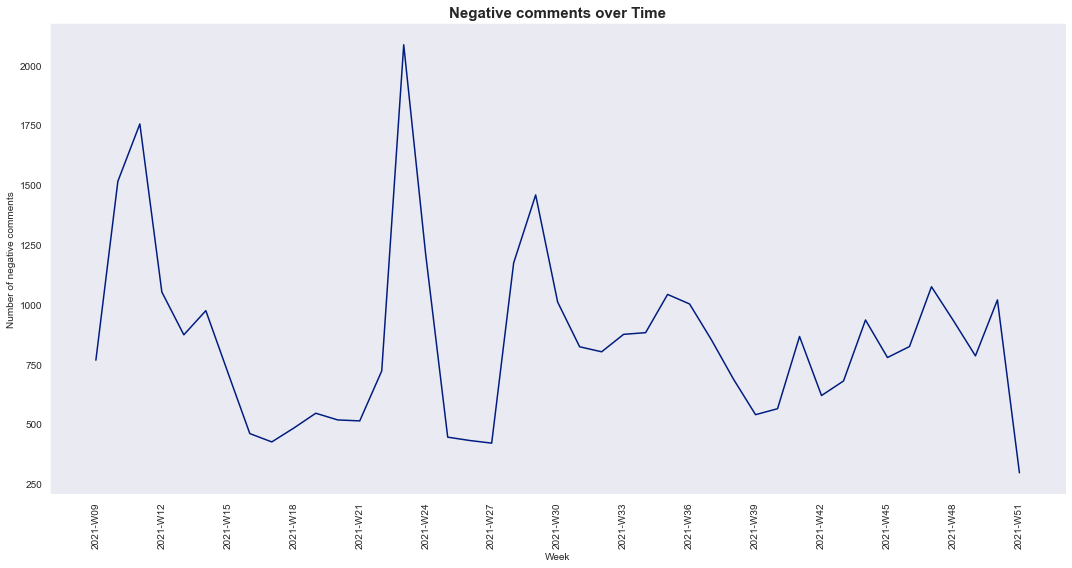

In [23]:
plt.figure(figsize=(15, 8))
plt.plot(final_df.Week, final_df.Negative, label="negative comments per day")

plt.xlabel("Week")
plt.ylabel("Number of negative comments")
plt.title("Negative comments over Time",fontdict={"fontweight":"bold","fontsize":15})

plt.xticks(final_df.Week[::3],rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

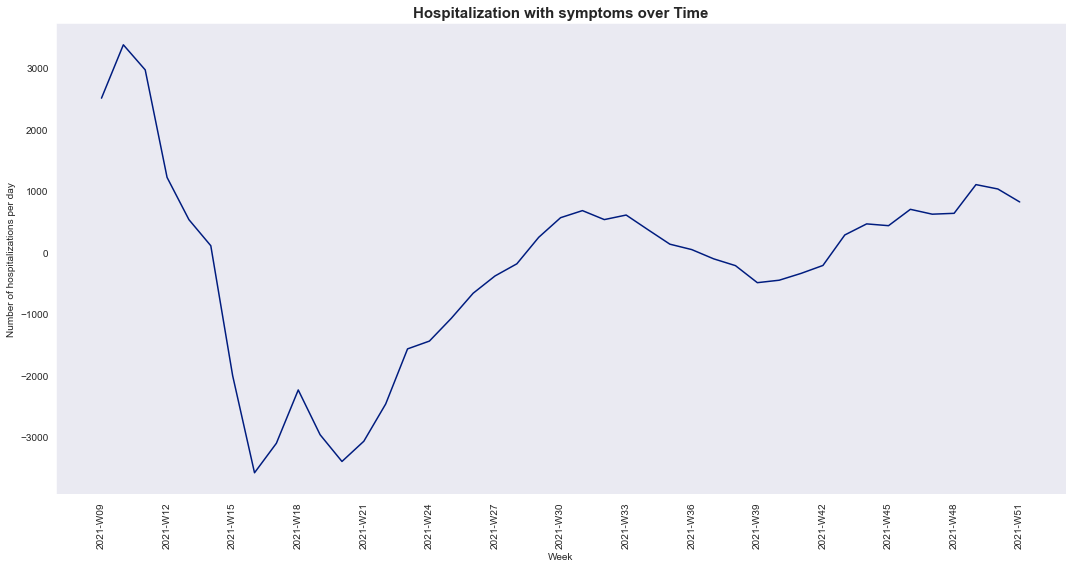

In [24]:
plt.figure(figsize=(15, 8))
plt.plot(final_df.Week, final_df.new_hosp_symptoms, label="hospitalization with symptoms per day")

plt.xlabel("Week")
plt.ylabel("Number of hospitalizations per day")
plt.title("Hospitalization with symptoms over Time",fontdict={"fontweight":"bold","fontsize":15})

plt.xticks(final_df.Week[::3],rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

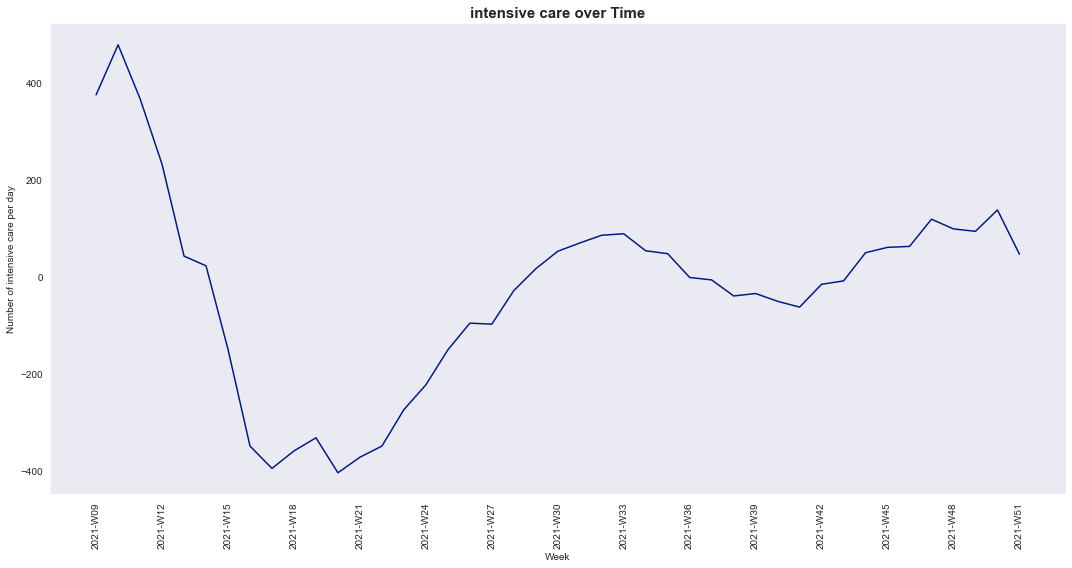

In [25]:
plt.figure(figsize=(15, 8))
plt.plot(final_df.Week, final_df.new_intensive_care, label="intensive care per day")

plt.xlabel("Week")
plt.ylabel("Number of intensive care per day")
plt.title("intensive care over Time",fontdict={"fontweight":"bold","fontsize":15})

plt.xticks(final_df.Week[::3],rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

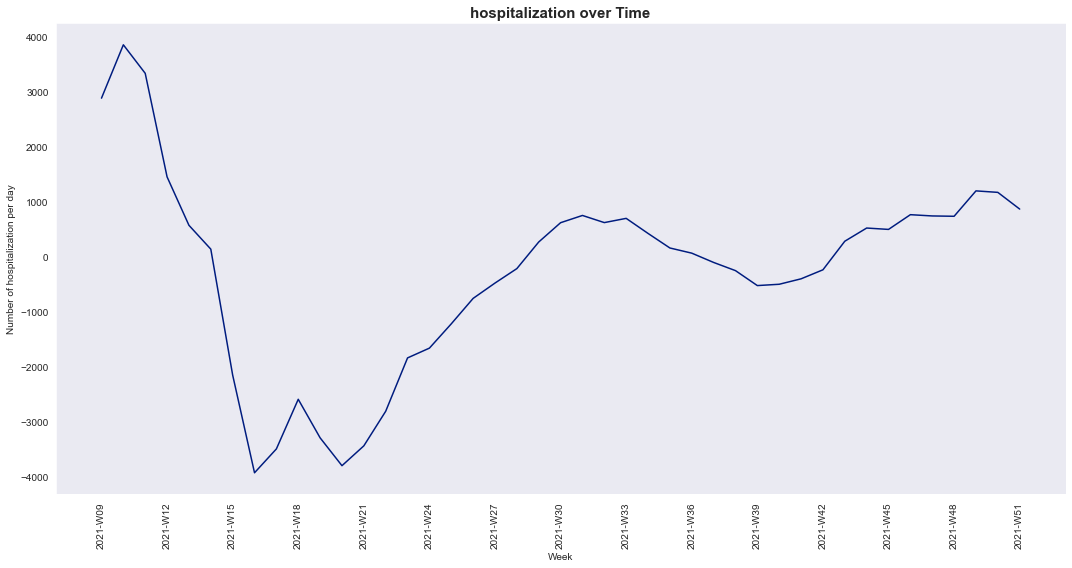

In [26]:
plt.figure(figsize=(15, 8))
plt.plot(final_df.Week, final_df.new_hosp, label="hospitalization per day")

plt.xlabel("Week")
plt.ylabel("Number of hospitalization per day")
plt.title("hospitalization over Time",fontdict={"fontweight":"bold","fontsize":15})

plt.xticks(final_df.Week[::3],rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

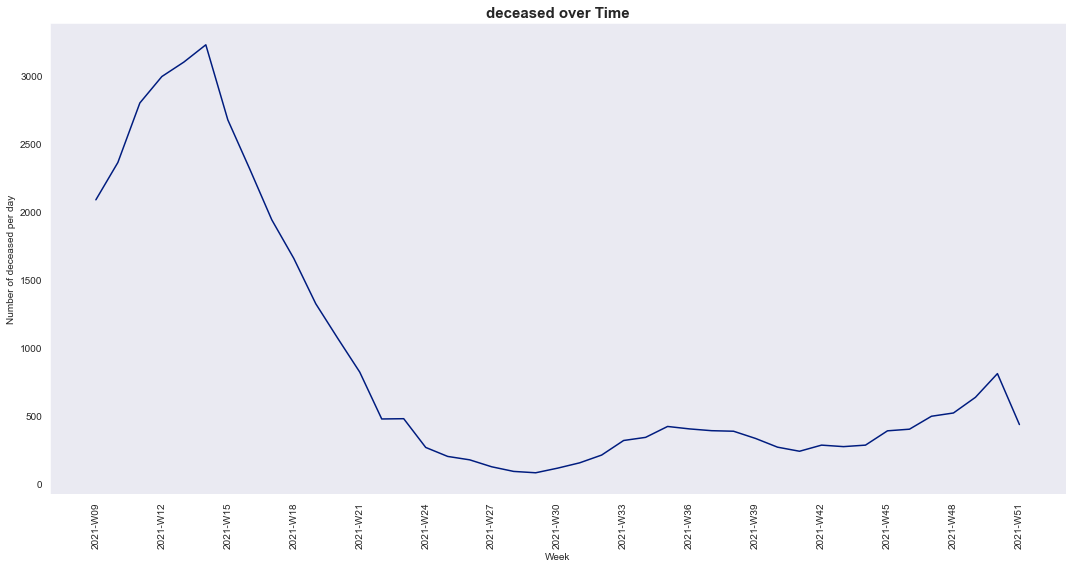

In [27]:
plt.figure(figsize=(15, 8))
plt.plot(final_df.Week, final_df.new_deceased, label="deceased per day")

plt.xlabel("Week")
plt.ylabel("Number of deceased per day")
plt.title("deceased over Time",fontdict={"fontweight":"bold","fontsize":15})

plt.xticks(final_df.Week[::3],rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

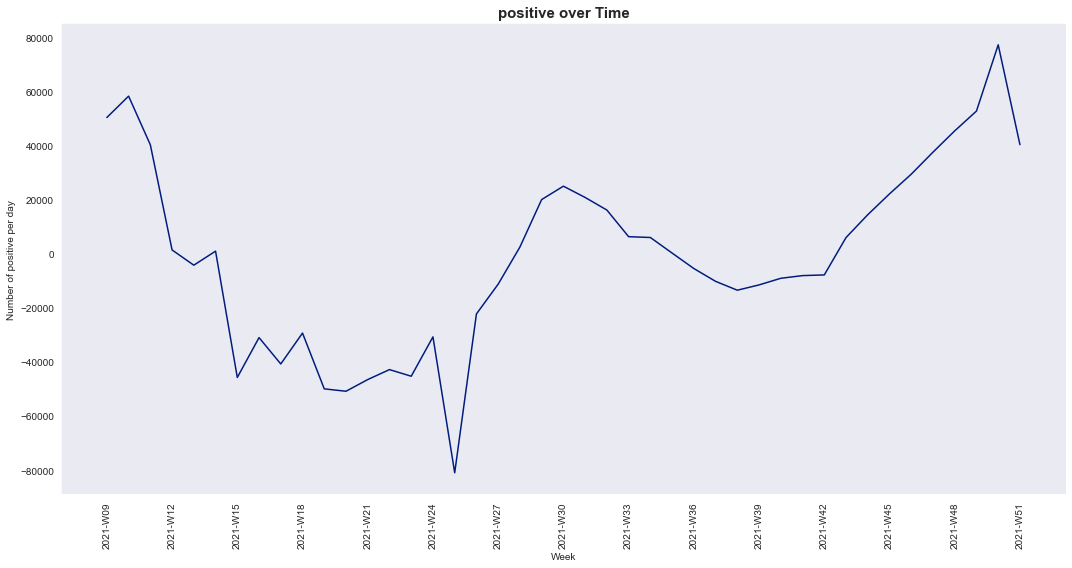

In [28]:
plt.figure(figsize=(15, 8))
plt.plot(final_df.Week, final_df.new_positives, label="positive per day")

plt.xlabel("Week")
plt.ylabel("Number of positive per day")
plt.title("positive over Time",fontdict={"fontweight":"bold","fontsize":15})

plt.xticks(final_df.Week[::3],rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

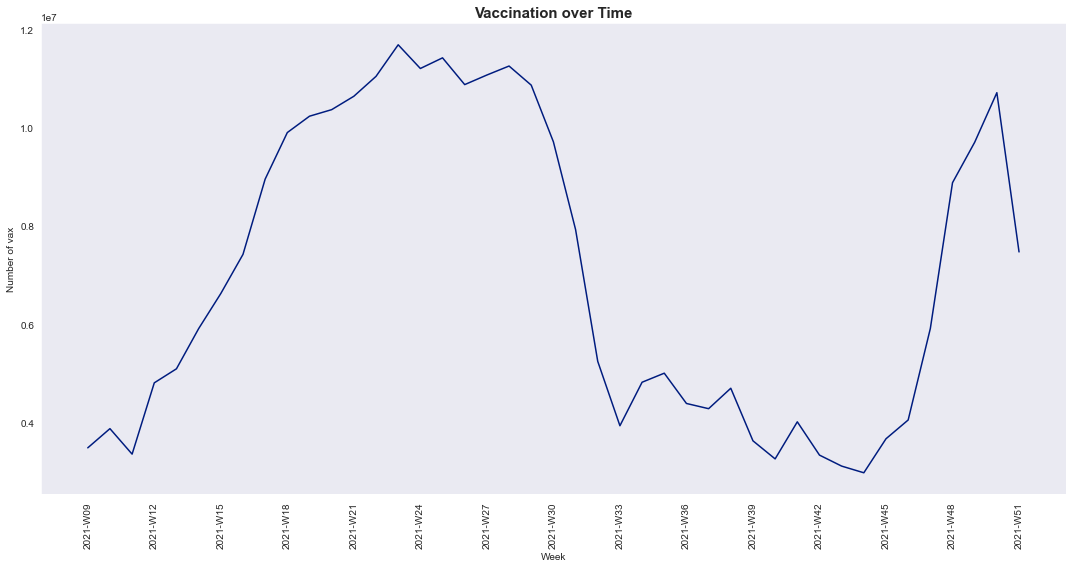

In [29]:
plt.figure(figsize=(15, 8))
plt.plot(final_df.Week, final_df.new_vaccination, label="vax per day")

plt.xlabel("Week")
plt.ylabel("Number of vax")
plt.title("Vaccination over Time",fontdict={"fontweight":"bold","fontsize":15})

plt.xticks(final_df.Week[::3],rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

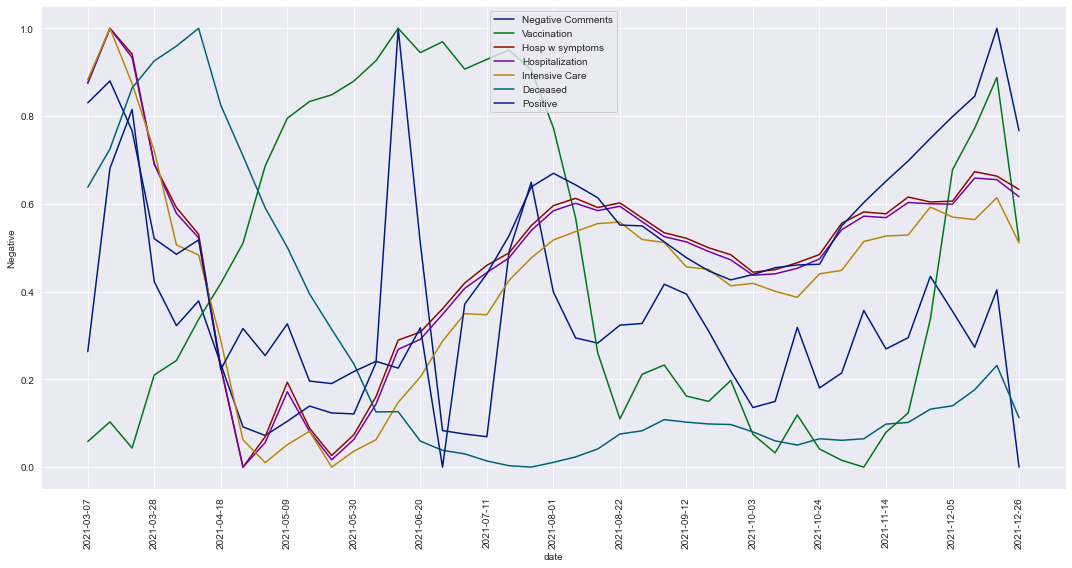

In [30]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = scaled_df.date, y = scaled_df.Negative, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.new_vaccination, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.new_hosp_symptoms, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.new_hosp, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.new_intensive_care, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.new_deceased, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.new_positives, data=scaled_df)
plt.legend(labels=["Negative Comments", "Vaccination", "Hosp w symptoms", "Hospitalization","Intensive Care", "Deceased", "Positive"])
plt.xticks(scaled_df.date[::3],rotation=90)
plt.tight_layout()
plt.show()

Let's see if the sentiments have some sort of correlation with the covid situation data.

We use function *heatmap* from seaborn to to create a correlation matrix.

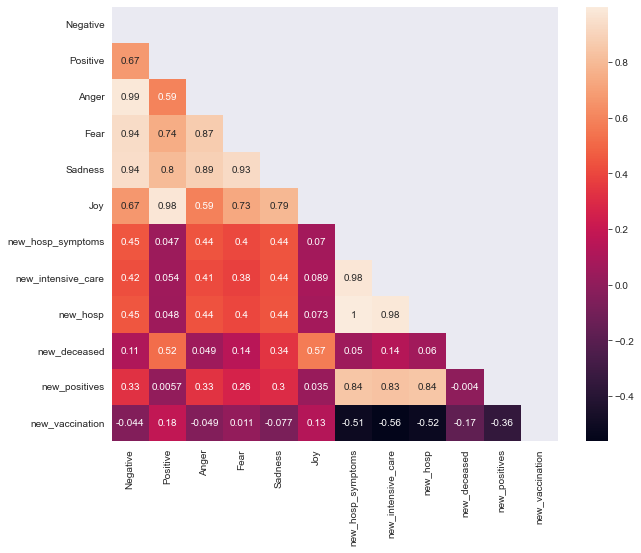

In [31]:
plt.figure(figsize=(10,8))
corr = scaled_df.corr() #calculate correlations
mask = np.triu(corr)  #create a mask for the upper triangle
sns.heatmap(corr, mask = mask, annot=True)
plt.show()

### Vaccinations vs Hospitalizations (trend over time)

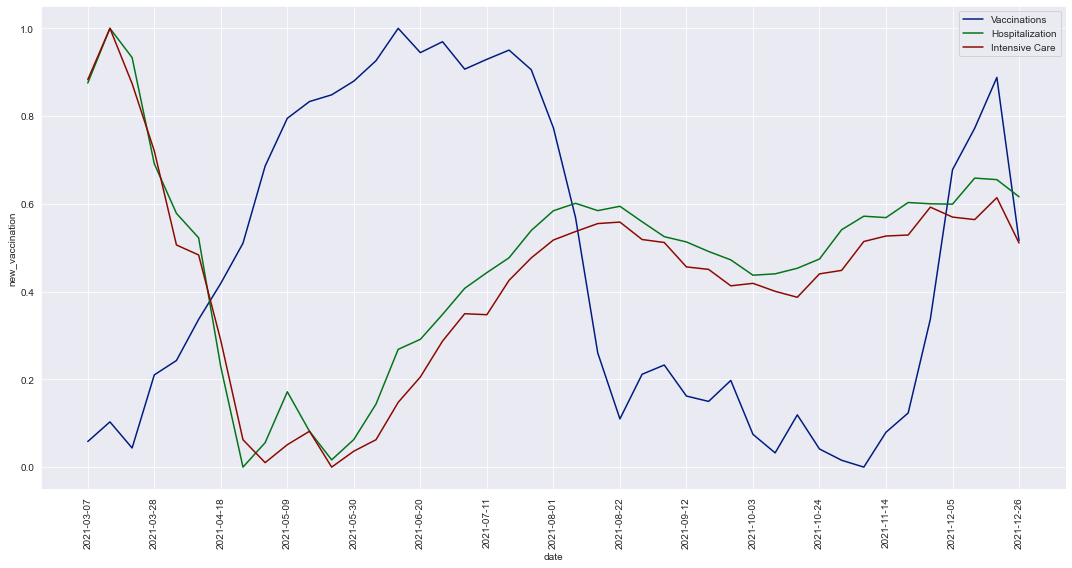

In [32]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = scaled_df.date, y = scaled_df.new_vaccination, data=scaled_df)

sns.lineplot(x = scaled_df.date, y = scaled_df.new_hosp, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.new_intensive_care, data=scaled_df)

plt.legend(labels=["Vaccinations", "Hospitalization", "Intensive Care"])
plt.xticks(scaled_df.date[::3],rotation=90)
plt.tight_layout()
plt.show()

### Vaccinations vs Hospitalizations Scatterplot

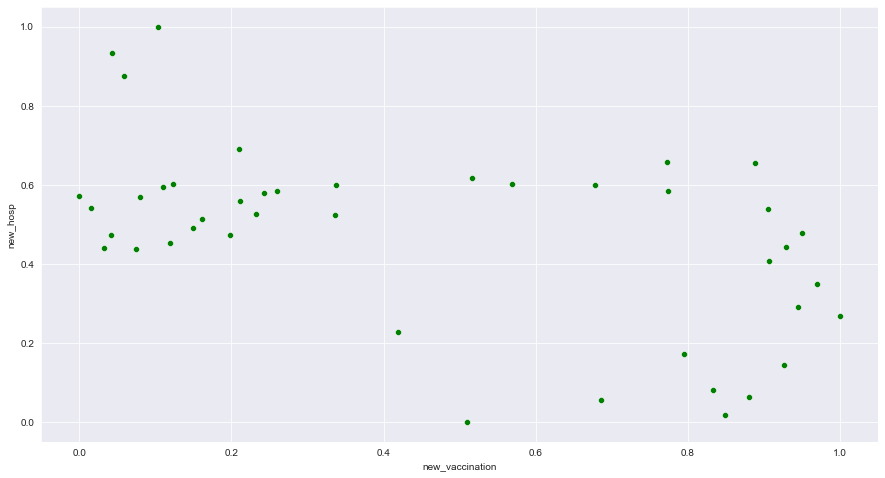

In [33]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = scaled_df.new_vaccination, y = scaled_df.new_hosp, data=scaled_df, color = "green")

plt.show()

We can observe a negative relationship between hospitalizations and vaccinations.

### Positive cases vs Negative comments (trend over time)

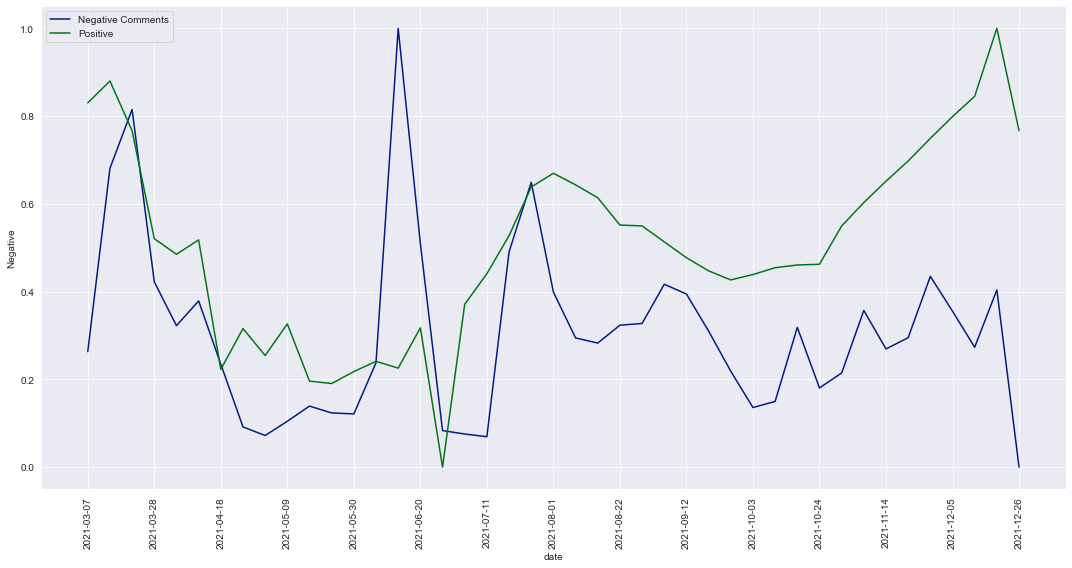

In [34]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = scaled_df.date, y = scaled_df.Negative, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.new_positives, data=scaled_df)
plt.legend(labels=["Negative Comments", "Positive"])
plt.xticks(scaled_df.date[::3],rotation=90)
plt.tight_layout()
plt.show()

We can note that initially the negative comments and new positive cases have a similar trend but then for some reason they start to have a more marked difference.

### Positive cases - Negative comments Scatterplot

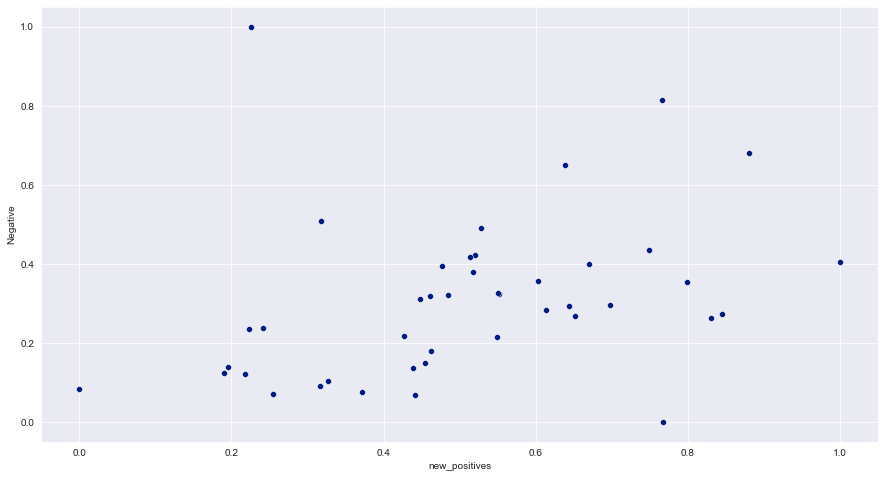

In [35]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = scaled_df.new_positives, y = scaled_df.Negative, data=scaled_df)

plt.show()

We can see that there is a positive relationship: when the positive cases rise there is an increment in the negative tweets too.

### Hospitalizations trend vs Negative comments (trend over time)

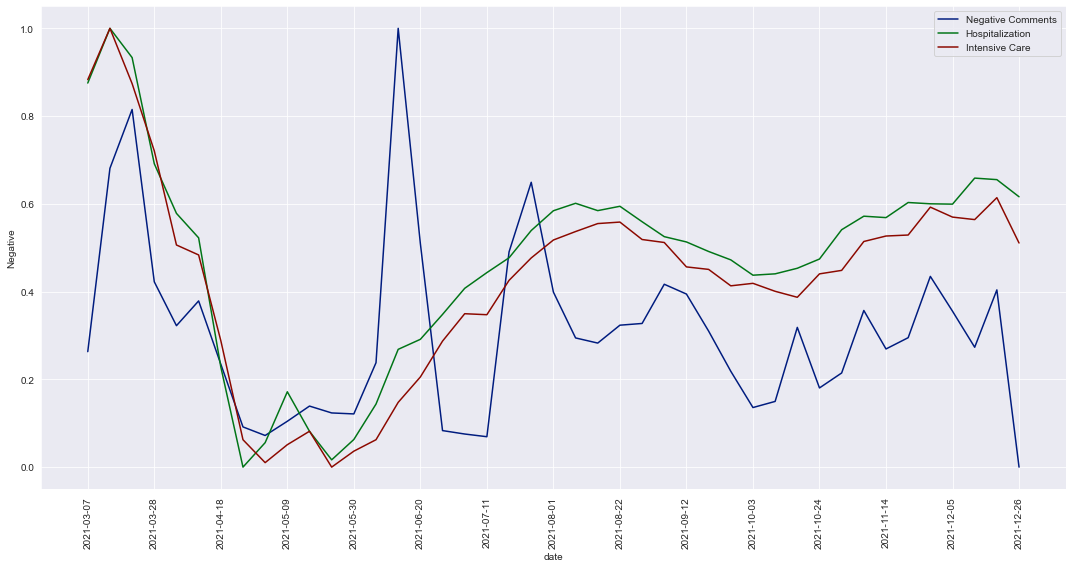

In [36]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = scaled_df.date, y = scaled_df.Negative, data=scaled_df)

sns.lineplot(x = scaled_df.date, y = scaled_df.new_hosp, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.new_intensive_care, data=scaled_df)

plt.legend(labels=["Negative Comments", "Hospitalization", "Intensive Care"])
plt.xticks(scaled_df.date[::3],rotation=90)
plt.tight_layout()
plt.show()

Hospitalization and hospitalization with symptoms has nearly the same trend and intensive care follows them, as we can see in the correlation heatmap they have perfect correlation; in fact, the first is the sum of the second with new intensive care per week.

Same as the previous plot we can see an initial similarity in the trends but the differences start to be more marked after 30-05-2021.

### Hospitalizations - Negative comments Scatterplot

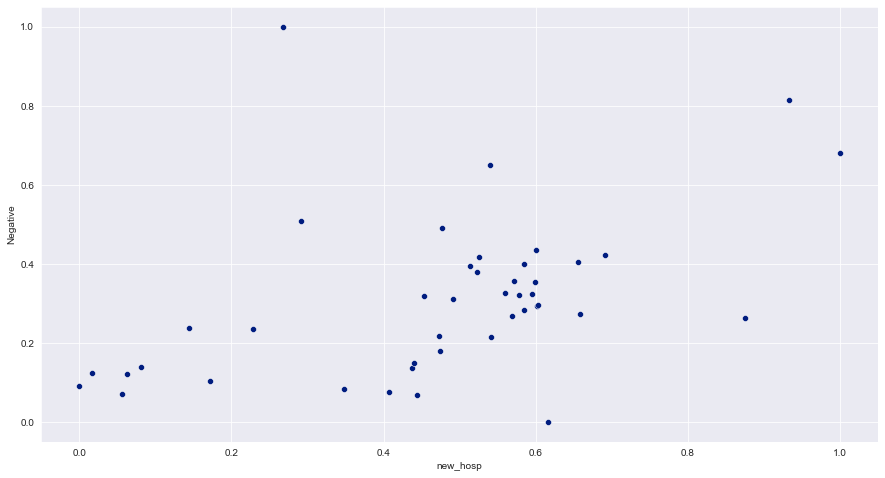

In [37]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = scaled_df.new_hosp, y = scaled_df.Negative, data=scaled_df)

plt.show()

We can note a positive relationship between hospitalizations and negative comments too.

### Positive comments vs Negative comments (trend over time)

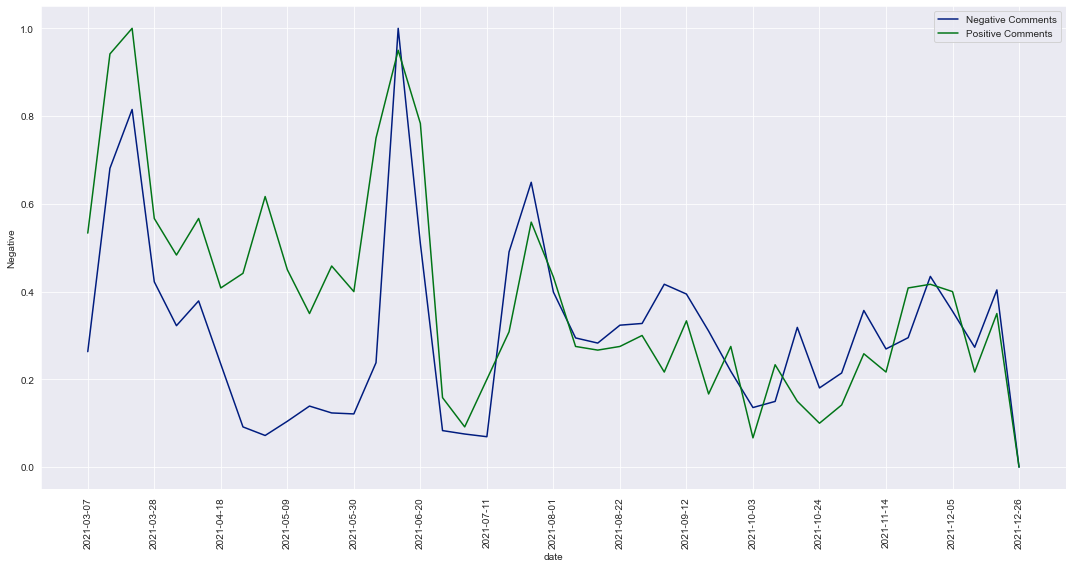

In [38]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = scaled_df.date, y = scaled_df.Negative, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.Positive, data=scaled_df)


plt.legend(labels=["Negative Comments","Positive Comments"])
plt.xticks(scaled_df.date[::3],rotation=90)
plt.tight_layout()
plt.show()

### New deceased vs Joy emotion (trend over time)

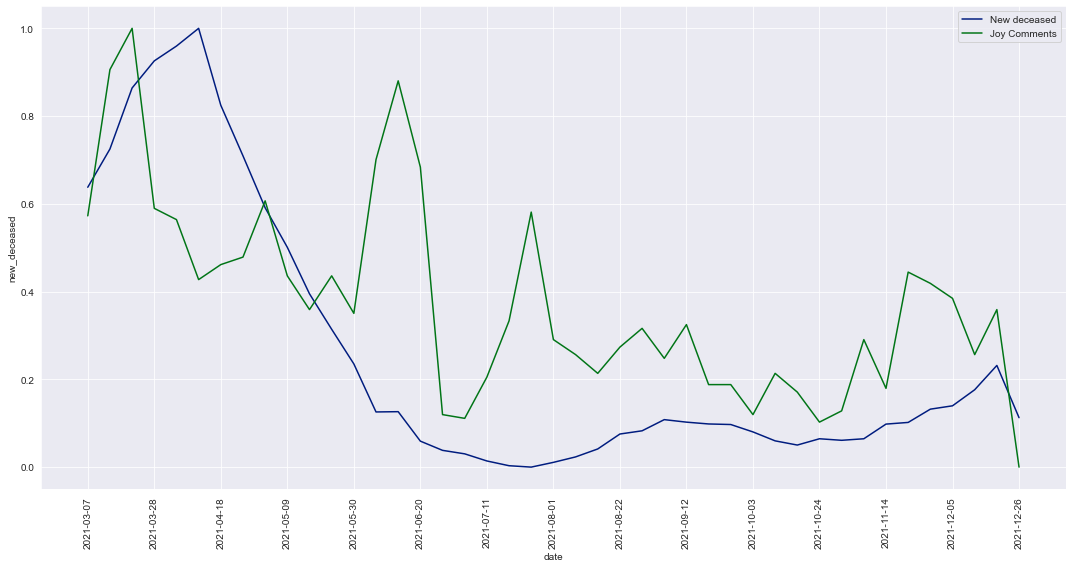

In [40]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = scaled_df.date, y = scaled_df.new_deceased, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.Joy, data=scaled_df)


plt.legend(labels=["New deceased","Joy Comments"])
plt.xticks(scaled_df.date[::3],rotation=90)
plt.tight_layout()
plt.show()

### Positive Comments vs New vaccinations (trend over time)

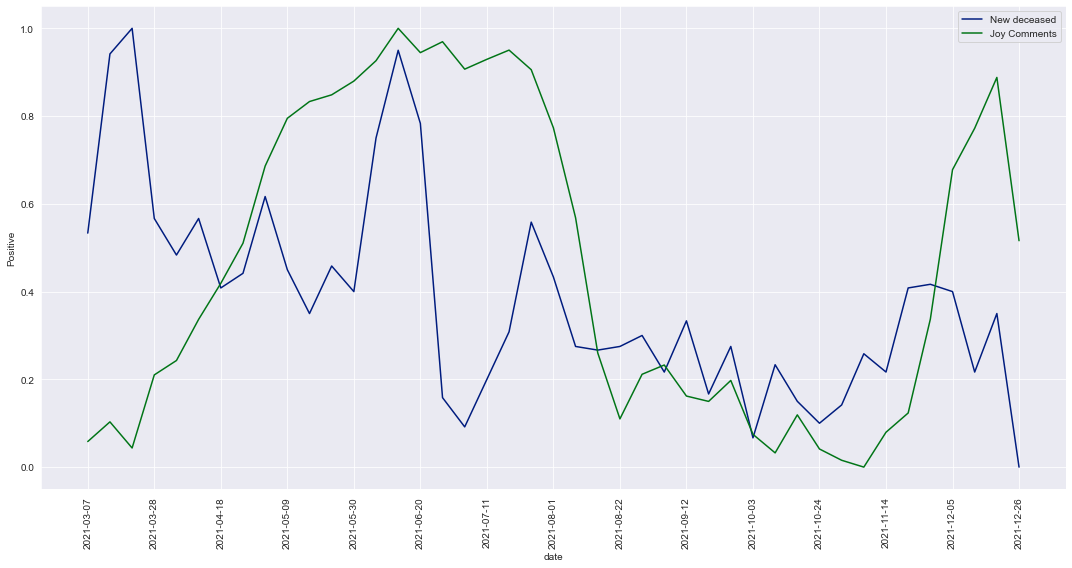

In [42]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = scaled_df.date, y = scaled_df.Positive, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.new_vaccination, data=scaled_df)


plt.legend(labels=["New deceased","Joy Comments"])
plt.xticks(scaled_df.date[::3],rotation=90)
plt.tight_layout()
plt.show()

### Tweets sentiments and emotions (trend over time)

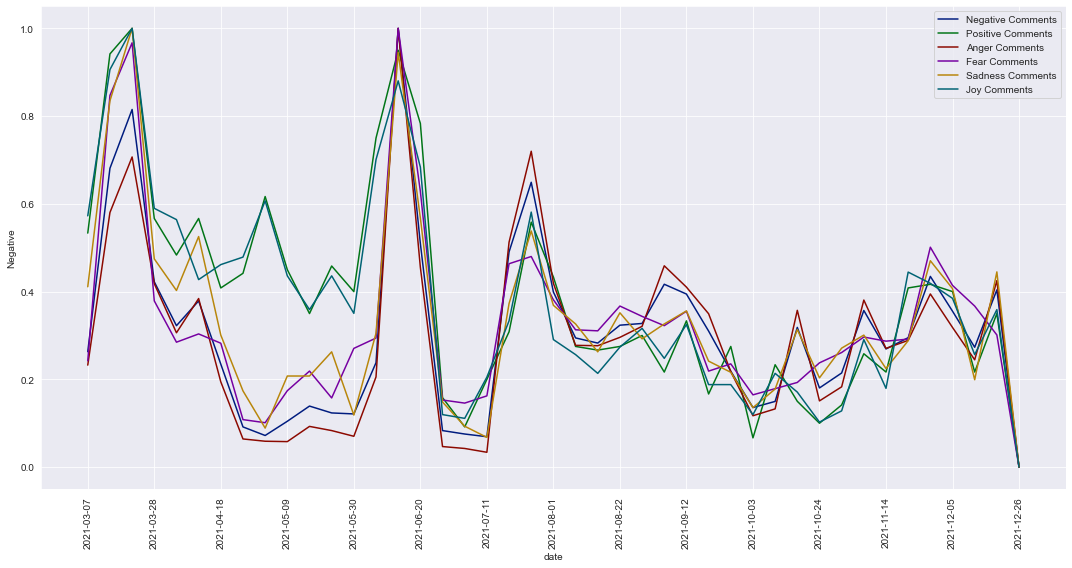

In [43]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = scaled_df.date, y = scaled_df.Negative, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.Positive, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.Anger, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.Fear, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.Sadness, data=scaled_df)
sns.lineplot(x = scaled_df.date, y = scaled_df.Joy, data=scaled_df)
plt.legend(labels=["Negative Comments", "Positive Comments","Anger Comments","Fear Comments", "Sadness Comments","Joy Comments"])
plt.xticks(final_df.date[::3],rotation=90)
plt.tight_layout()
plt.show()

Here we plot the trend over time of twitter sentiments and emotions and we can observe that they all have similar trends, they all rise in similar points of time for some reason.

## Final Considerations


It can be interesting to investigate if the marked differences in the trends with sentiments and emotions are caused by external factors like government laws and impositions to the general population (DPCM, Green Pass ect.).


*Knowing that sentiments and emotions all follow a similar trend we will plot the Negative comments as representative to visualize more clearly the external factors*

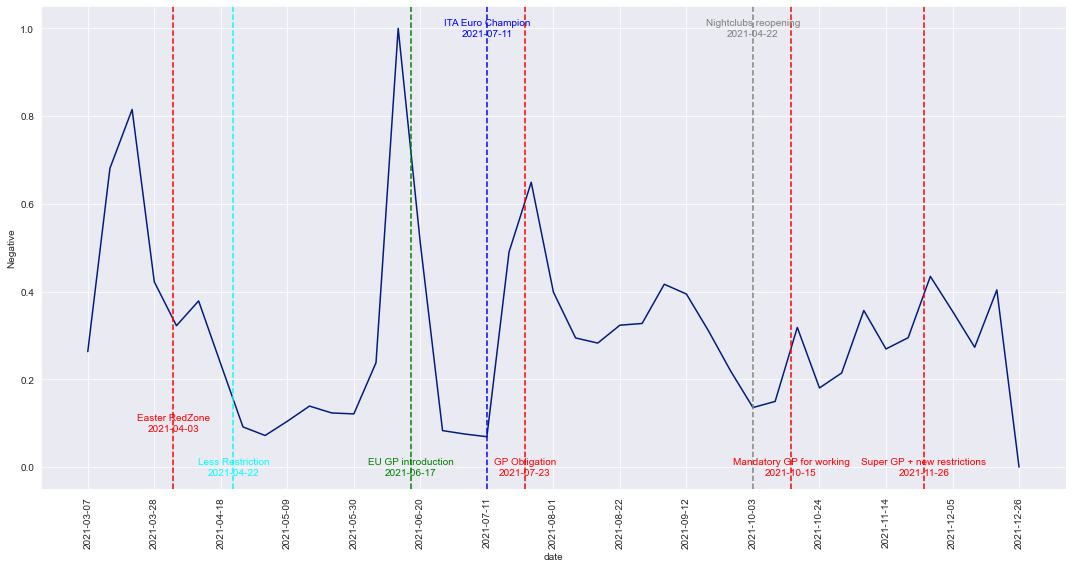

In [7]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = scaled_df.date, y = scaled_df.Negative, data=scaled_df)
#plt.legend(labels=["Negative Comments", "Positive Comments"])

plt.axvline(dt.datetime(2021,4,3), color = "red", linestyle = "--")  #national red zone for Easter
plt.text(dt.datetime(2021,4,3),0.1, 'Easter RedZone\n2021-04-03', ha='center', va='center',color = "red")
plt.axvline(dt.datetime(2021,4,22), color = "cyan", linestyle = "--") #DPCM less restrictions
plt.text(dt.datetime(2021,4,22),0, 'Less Restriction\n2021-04-22', ha='center', va='center',color = "cyan")
plt.axvline(dt.datetime(2021,6,17), color = "green", linestyle = "--") #EU approve introduction of Green Pass
plt.text(dt.datetime(2021,6,17),0, 'EU GP introduction\n2021-06-17', ha='center', va='center',color = "green")
plt.axvline(dt.datetime(2021,7,11), color = "blue", linestyle = "--") #Italy wins the European Cup
plt.text(dt.datetime(2021,7,11),1, 'ITA Euro Champion\n2021-07-11', ha='center', va='center',color = "blue")
plt.axvline(dt.datetime(2021,7,23), color = "red", linestyle = "--") #Green Pass obligation
plt.text(dt.datetime(2021,7,23),0, 'GP Obligation\n2021-07-23', ha='center', va='center',color = "red")
plt.axvline(dt.datetime(2021,10,3), color = "gray", linestyle = "--") #Reopening of nightclubs
plt.text(dt.datetime(2021,10,3),1, 'Nightclubs reopening\n2021-04-22', ha='center', va='center',color = "gray")
plt.axvline(dt.datetime(2021,10,15), color = "red", linestyle = "--")#New restrictions to unvaccinated people + GreenPass for working
plt.text(dt.datetime(2021,10,15),0, 'Mandatory GP for working\n2021-10-15', ha='center', va='center',color = "red")
plt.axvline(dt.datetime(2021,11,26), color = "red", linestyle = "--")#new restrictions + Super Green Pass
plt.text(dt.datetime(2021,11,26),0, 'Super GP + new restrictions\n2021-11-26', ha='center', va='center',color = "red")



plt.xticks(scaled_df.date[::3],rotation=90)
plt.tight_layout()
plt.show()

As we can observe from this plot the peaks are characterized by DPCMs which contain restrictions as we can see for the red lines.

The cyan line represents the DPCM of 22/04/2021 that annouces less restrictions, we can observe a peak in the Positive and Joy lines in the previous graph.

The green line represents the date when the EU approved the application of Green Passes, we can see the peak in that week as the rumors spread sometime before the effective date.

Then we can see a plundge corresponding to the blue line as Italy became the European Champions of Football, so the attention are moved away from vaccine and covid situtation.

The successive red line is when Green Pass was decreted mandatory for indoor consumption in restaurants/bars.

The gray line represents the reopening of nightclubs after 1 year.

As **final considerations** we conclude that Twitter users' sentiment and emotions towards vaccines are lowly/moderatedly correlated with the pandemic situations (0.5 is considered a moderate level of correlation, 0.3 to 0.5 is considered low level of correlation and when the level is between 0 to 0.3 the correlation is negligible).

The general sentiment perceived is negative and heavily influenced by external factors like laws and news that had a more direct impact on life. The main emotion is anger probably generated by the uncertainty created by the pandemic situation, the ambiguous DPCMs which sometimes contrast the idea that with vaccination there will be an exit to the covid situation. 

This may be one of the reasons that lowers the correlation levels, maybe a higher interval of time and daily data could prove higher levels of correlations. Another important factor is the Sentiment and Emotion classification, which can't be 100% accurate .